In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import load_per_file_processed_data

2024-03-05 15:41:47.554180: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 15:41:48.215023: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 15:41:48.228137: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-05 15:41:58.540646: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data_folder = "data/processed_embeddings"

embeddings, labels, all_labels = load_per_file_processed_data(data_folder)

[(k, len(e), e[0].shape) for k, e in embeddings.items()]

[(('yamnet', 'sons_al_balco_2020'), 114, (88, 1024)),
 (('yamnet', 'sons_al_balco_2021'), 125, (88, 1024)),
 (('perch', 'sons_al_balco_2020'), 114, (6, 1280)),
 (('perch', 'sons_al_balco_2021'), 125, (6, 1280)),
 (('birdnet', 'sons_al_balco_2020'), 114, (10, 1024)),
 (('birdnet', 'sons_al_balco_2021'), 125, (10, 1024))]

In [3]:
[(k, len(e), len(e[0])) for k, e in labels.items()]

[(('yamnet', 'sons_al_balco_2020'), 114, 88),
 (('yamnet', 'sons_al_balco_2021'), 125, 88),
 (('perch', 'sons_al_balco_2020'), 114, 6),
 (('perch', 'sons_al_balco_2021'), 125, 6),
 (('birdnet', 'sons_al_balco_2020'), 114, 10),
 (('birdnet', 'sons_al_balco_2021'), 125, 10)]

In [4]:
len(all_labels), all_labels  

(29,
 ['Human/Cough',
  'Human/Movement',
  'Human/Movement/Steps',
  'Human/Music',
  'Human/Voice',
  'Industrial/Construction',
  'Industrial/Industry',
  'Industrial/Vacuum',
  'Industrial/Ventilation',
  'Nature/Animals/Bird',
  'Nature/Animals/Cat',
  'Nature/Animals/Dog',
  'Nature/Elements/Water',
  'Nature/Elements/Wind',
  'Nature/Vegetation',
  'Signals',
  'Signals/Alarm',
  'Signals/Bells',
  'Signals/Klaxon',
  'Signals/Siren',
  'Things/Blind',
  'Things/Door',
  'Things/Movement',
  'Things/Trolley',
  'Transport/Motorized',
  'Transport/Motorized/Air',
  'Transport/Motorized/Rail',
  'Transport/Motorized/Road',
  'Transport/Non-motorized'])

In [5]:
def study_dataset(labels, embeddings):
    # labels is a list (n_files) of lists (n_frame in each file) of lists of labels
    # embeddings is a list (n_files) of np.arrays of shape (n_frame, emb_dim)

    print("Number of files: ", len(labels))

    print("Dimensions of the embeddings: ", embeddings[0].shape[1])

    print("Total number of frames: ", sum([e.shape[0] for e in embeddings]))

    n_empty_labs = 0
    for file_l in labels:
        for frame_l in file_l:
            if len(frame_l) == 0:
                n_empty_labs += 1
    print("Number of frames with empty labels: ", n_empty_labs)
    
    pd.Series([e.shape[0] for e in embeddings]).hist()
    plt.title("Distribution of number of frames in the files")
    plt.show()

    # bar chart of the number of labels in this dataset
    total_labels = []
    for file_l in labels:
        for frame_l in file_l:
            total_labels.extend(frame_l)
    keys, counts = np.unique(total_labels, return_counts=True)
    bars = plt.bar(keys, counts)
    # plot values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

    plt.title("Value counts of the labels")
    plt.xticks(rotation=90, fontsize=6)
    plt.show()

    # bar chart of the first level of the taxonomy
    total_labels = []
    for file_l in labels:
        for frame_l in file_l:
            total_labels.extend([el.split("/")[0] for el in frame_l])
    keys, counts = np.unique(total_labels, return_counts=True)
    bars = plt.bar(keys, counts)
    # plot values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

    plt.title("Value counts of the first level of the labels")
    plt.xticks(rotation=90, fontsize=6)
    plt.show()

Statistics and plot for yamnet and sons_al_balco_2020
Number of files:  114
Dimensions of the embeddings:  1024
Total number of frames:  10411
Number of frames with empty labels:  7122


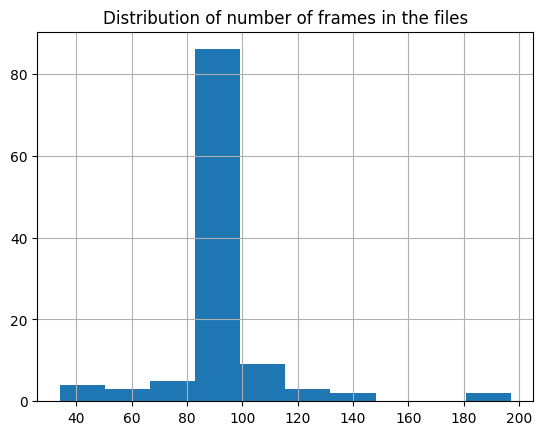

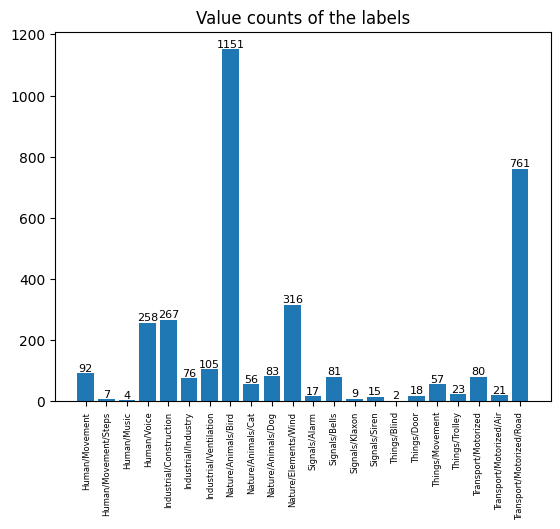

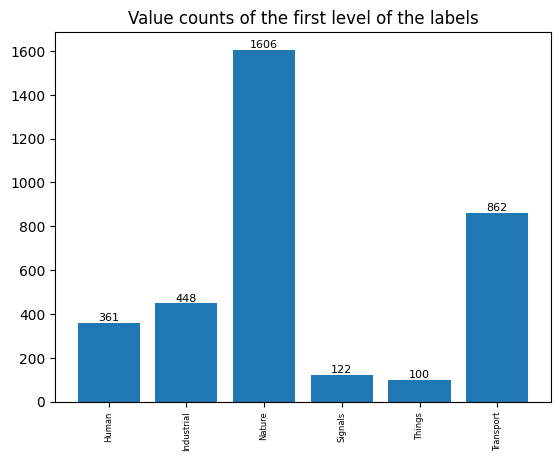

Statistics and plot for yamnet and sons_al_balco_2021
Number of files:  125
Dimensions of the embeddings:  1024
Total number of frames:  12017
Number of frames with empty labels:  6890


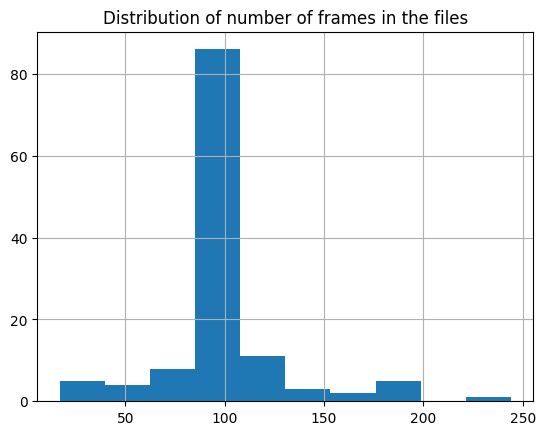

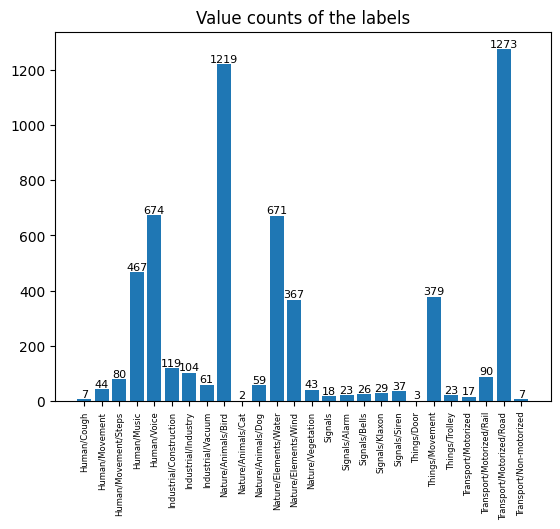

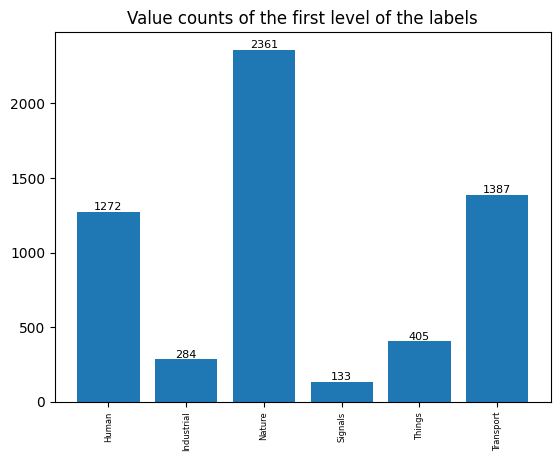

In [6]:
for model in ["yamnet"]:    # models:
    for dataset in ["sons_al_balco_2020", "sons_al_balco_2021"]:   # dataset_names:
        labs = labels[(model, dataset)]
        embs = embeddings[(model, dataset)]
        print(f"Statistics and plot for {model} and {dataset}")
        study_dataset(labs, embs)